# Importimi i Librarive

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Leximi i datasetit si dhe shfaqja e informatave te ndryshme rreth tij

In [12]:
house_dataset = pd.read_csv('./Housing.csv')
house_dataset.head()
house_dataset.describe()
house_dataset.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [4]:
house_dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# One Hot Encoding

In [13]:
#One Hot Encoding
categorical_columns = house_dataset.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(house_dataset[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded,columns=encoder.get_feature_names_out(categorical_columns))
house_dataset_encoded = pd.concat([house_dataset,one_hot_df],axis=1)
house_dataset_encoded = house_dataset_encoded.drop(categorical_columns,axis=1)
print(f"Encoded House data: \n{house_dataset_encoded}")
house_dataset_encoded.head()

Encoded House data: 
        price  area  bedrooms  bathrooms  stories  parking  mainroad_no  \
0    13300000  7420         4          2        3        2          0.0   
1    12250000  8960         4          4        4        3          0.0   
2    12250000  9960         3          2        2        2          0.0   
3    12215000  7500         4          2        2        3          0.0   
4    11410000  7420         4          1        2        2          0.0   
..        ...   ...       ...        ...      ...      ...          ...   
540   1820000  3000         2          1        1        2          0.0   
541   1767150  2400         3          1        1        0          1.0   
542   1750000  3620         2          1        1        0          0.0   
543   1750000  2910         3          1        1        0          1.0   
544   1750000  3850         3          1        2        0          0.0   

     mainroad_yes  guestroom_no  guestroom_yes  ...  basement_yes  \
0        

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,12250000,8960,4,4,4,3,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,2,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,12215000,7500,4,2,2,3,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,11410000,7420,4,1,2,2,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [14]:
house_dataset_encoded = house_dataset.copy()

for col in categorical_columns:
    le = LabelEncoder()
    house_dataset_encoded[col] = le.fit_transform(house_dataset_encoded[col])

print("Encoded House Data (with structure preserved):")
print(house_dataset_encoded.head())

Encoded House Data (with structure preserved):
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 0  
1                 0  
2                 1  
3                 0  
4

In [15]:
# Select features from the encoded dataset
X = house_dataset_encoded[['area', 'bedrooms', 'mainroad', 'furnishingstatus']]
Y = house_dataset_encoded['price']

# Print X and Y to verify
print(X)
print("==================================================")
print(Y)

     area  bedrooms  mainroad  furnishingstatus
0    7420         4         1                 0
1    8960         4         1                 0
2    9960         3         1                 1
3    7500         4         1                 0
4    7420         4         1                 0
..    ...       ...       ...               ...
540  3000         2         1                 2
541  2400         3         0                 1
542  3620         2         1                 2
543  2910         3         0                 0
544  3850         3         1                 2

[545 rows x 4 columns]
0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


# Ndarja e te dhenave trajnuese dhe testuese

In [16]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Trajnimi i modelit me Linear Regression

In [17]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Matja e metrikave te modelit

In [18]:
# Evaluate the model

y_hat = model.predict(X_test)

mse = mean_squared_error(y_test, y_hat)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_hat)

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Root Mean Squared Error: 1756043.4224683773
Mean Absolute Error: 1302846.216112118


# Trajnimi i modelit me Random Forest

In [19]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Matja e metrikave

In [20]:

y_hat = model_rf.predict(X_test)

mse = mean_squared_error(y_test, y_hat)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_hat)

mape = (abs((y_test - y_hat) / y_test).mean()) * 100  # Mean Absolute Percentage Error
rmspe = ((1 / len(y_test)) * (((y_test - y_hat) / y_test) ** 2).sum()) ** 0.5 * 100  # Root Mean Squared Percentage Error

# Print results
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Percentage Error (RMSPE): {rmspe:.2f}%")

Root Mean Squared Error (RMSE): 1767755.455521037
Mean Absolute Error (MAE): 1242949.1503660455
Mean Absolute Percentage Error (MAPE): 26.03%
Root Mean Squared Percentage Error (RMSPE): 34.96%


# Vleresimi i variablave qe ndikojne me se shumti ne model

            feature  importance
0              area    0.748248
1          bedrooms    0.122472
3  furnishingstatus    0.107775
2          mainroad    0.021505


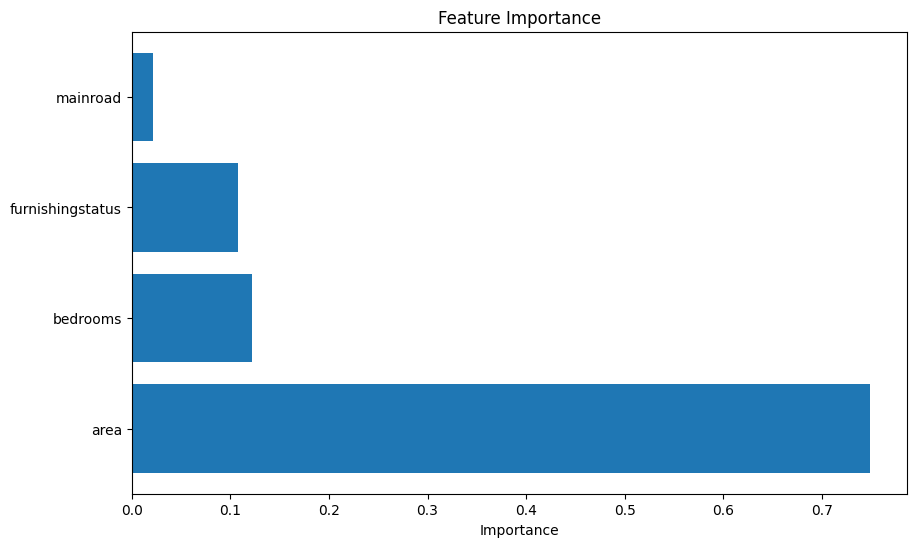

In [21]:
# Get feature importances
feature_importances = model_rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

# Optionally, visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [22]:
#main road: 1 = yes, 0 = no
#furnishingstatus: furnished = 0, semi-furnished = 1, unfurnished = 2
new_data = [[6000, 2, 1, 2]] # ['area', 'bedrooms', 'mainroad', 'furnishingstatus']

predicted_price = model_rf.predict(new_data)
print("Predicted Price:", predicted_price[0])

Predicted Price: 4080652.916666667


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


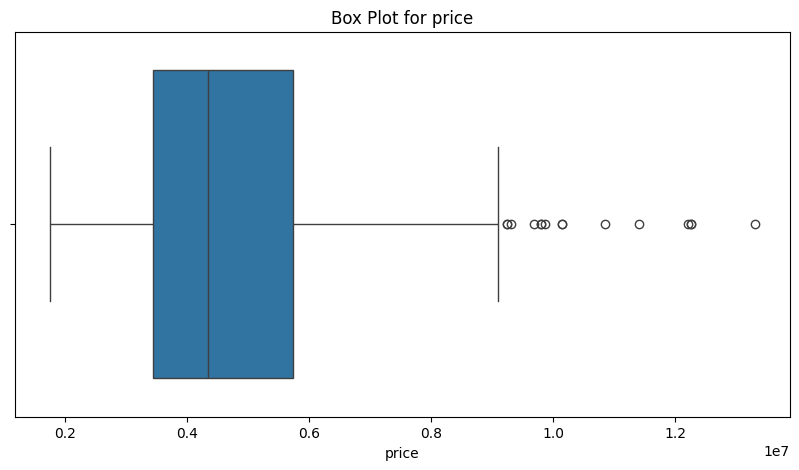

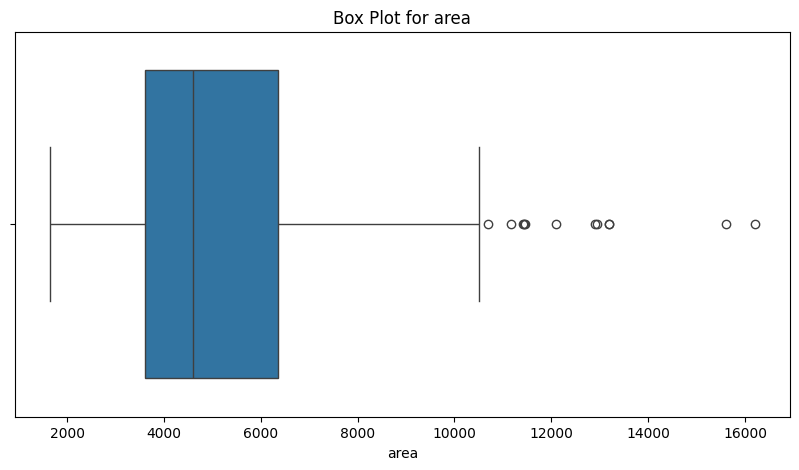

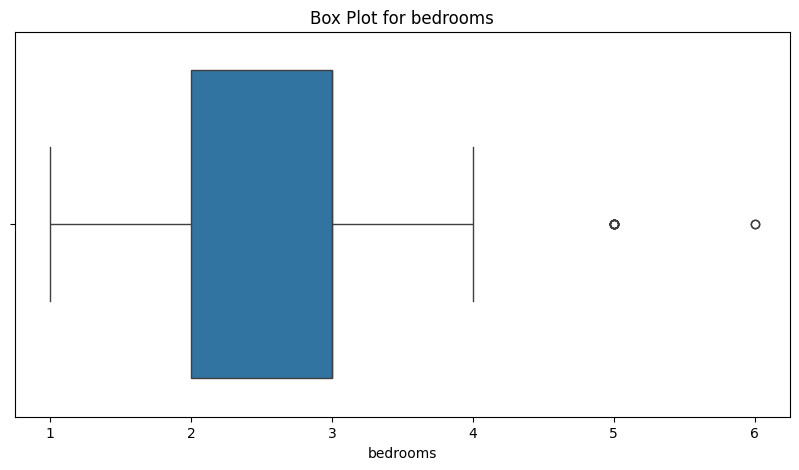

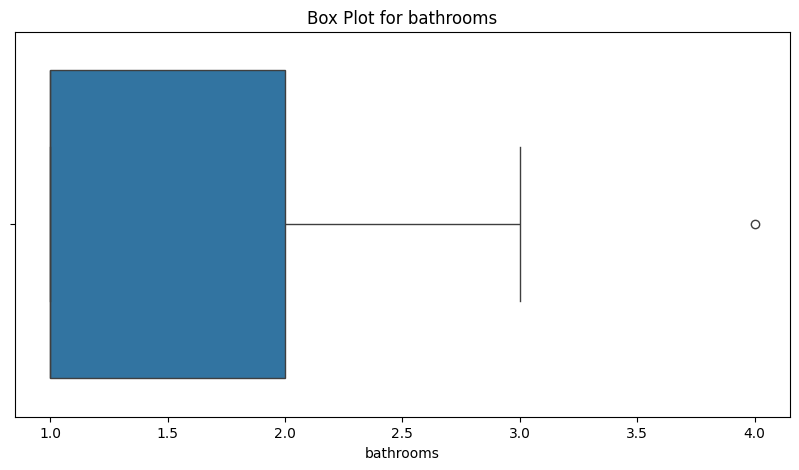

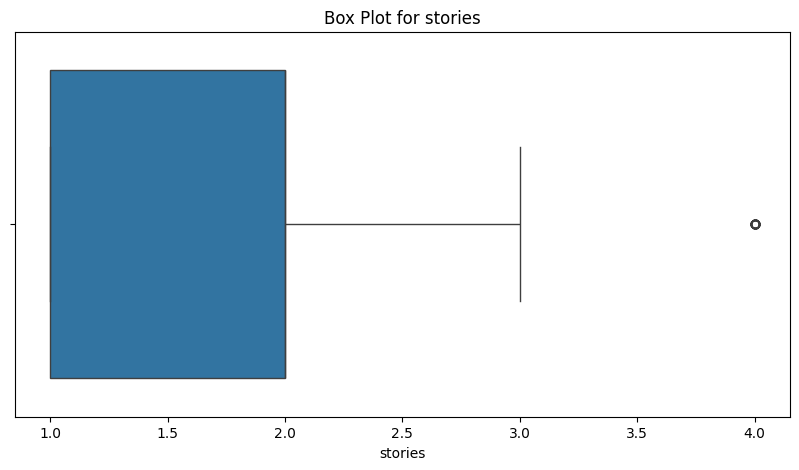

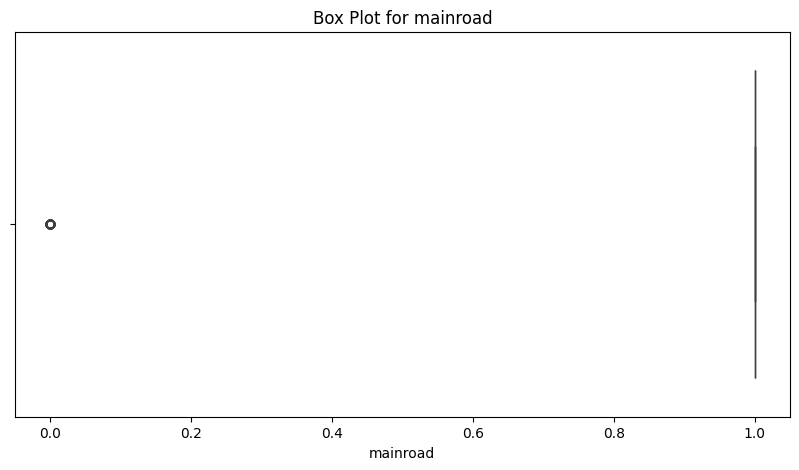

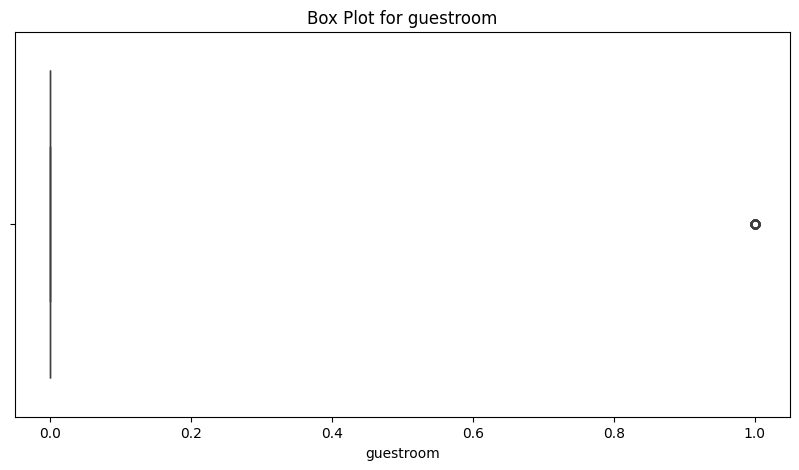

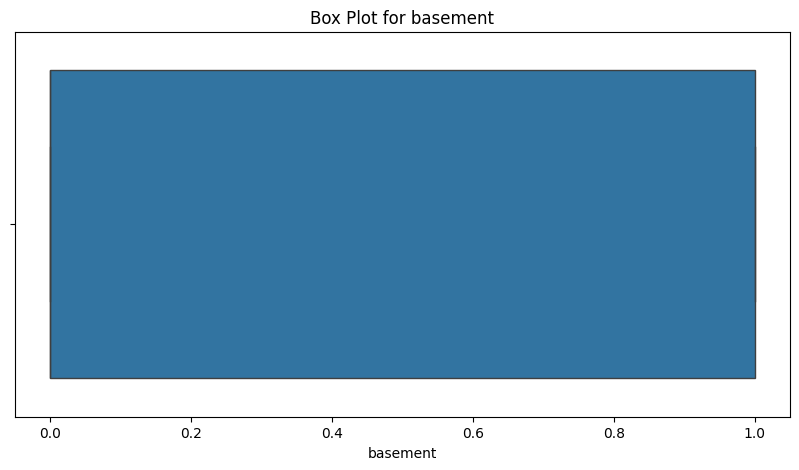

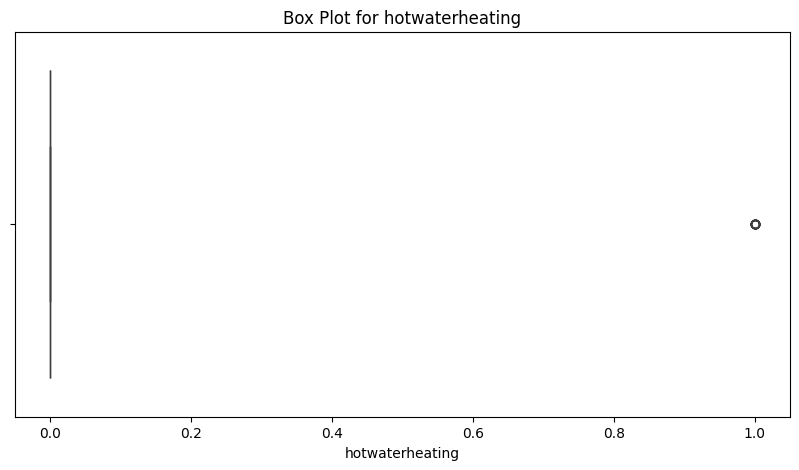

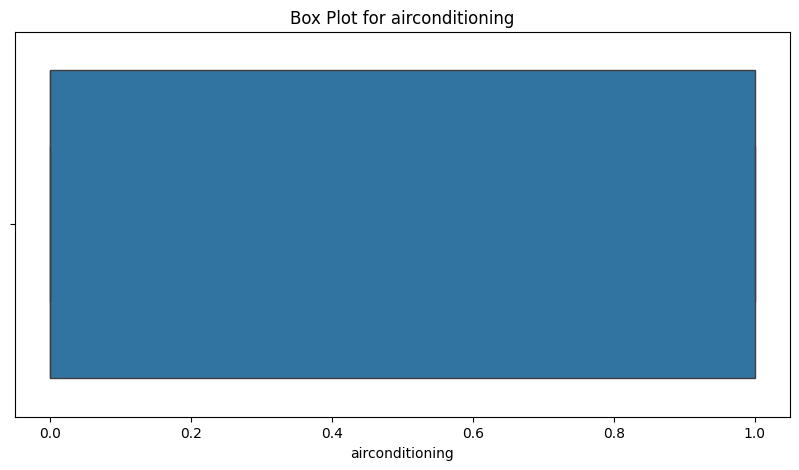

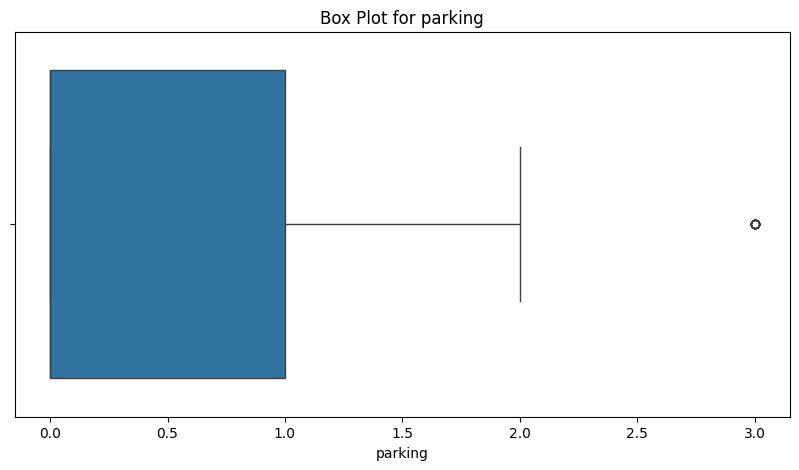

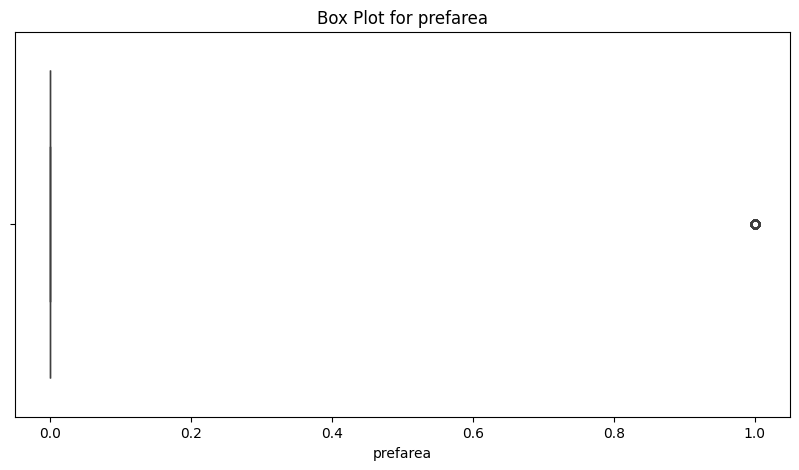

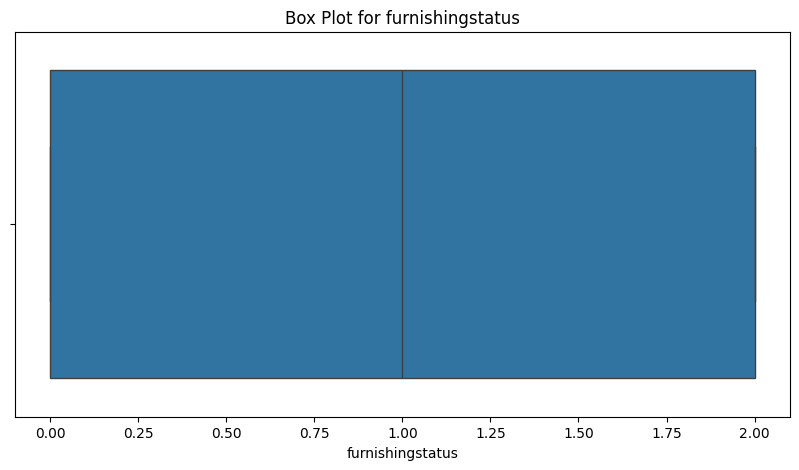

In [23]:
import seaborn as sns

for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=house_dataset_encoded[col])
    plt.title(f"Box Plot for {col}")
    plt.show()

# Zevendesimi i vlerave tekstuale me vlera numerike

In [ ]:
house_dataset.replace({"mainroad": {'yes': 1, 'no': 0}}, inplace=True)
house_dataset.infer_objects(copy=False)
house_dataset.head()

In [ ]:
house_dataset.replace({"guestroom":{'no':0, 'yes':1}, "basement":{'no':0, 'yes':1},"hotwaterheating":{'no':0, 'yes':1}, "airconditioning":{'no':0, 'yes':1},"prefarea": {'no':0, 'yes':1} }, inplace=True) #"furnishingstatus":{'unfurnished':1,'semi-furnished':2,'furnished':3}
house_dataset.infer_objects(copy=False)
house_dataset.head()

<ipython-input-6-3127ae4f0c52>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house_dataset.replace({"guestroom":{'no':0, 'yes':1}, "basement":{'no':0, 'yes':1},"hotwaterheating":{'no':0, 'yes':1}, "airconditioning":{'no':0, 'yes':1},"prefarea": {'no':0, 'yes':1} }, inplace=True) #"furnishingstatus":{'unfurnished':1,'semi-furnished':2,'furnished':3}


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


# Selektimi i Features dhe caktimi i Independent Variable

In [ ]:
X = house_dataset[['area', 'bedrooms', 'mainroad', 'furnishingstatus']]
Y = house_dataset['price']
print(X)
print(Y)

KeyError: "['mainroad', 'furnishingstatus'] not in index"

# Ndarja e te dhenave ne te dhena trajnuese dhe testuese

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

NameError: name 'X' is not defined

# Trajnimi i modelit duke perdor te dhenat trajnuese

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Matja e gabimit mesatar midis vleres se parashikuar dhe vleres aktuale

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
y_hat = model.predict(X_test)

mse = mean_squared_error(y_test, y_hat)
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Root Mean Squared Error: 1756043.4224683773
Mean Absolute Error: 1302846.216112118


# Gjetja e features te cilat e afektojne modelin

            feature  importance
0              area    0.748441
1          bedrooms    0.121988
3  furnishingstatus    0.108156
2          mainroad    0.021416


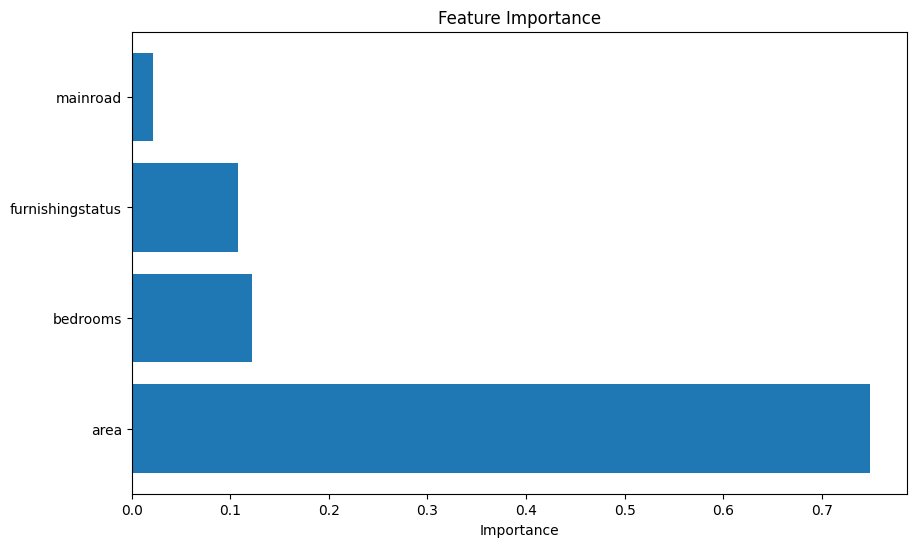

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Fit your model (using Random Forest as an example)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

# Optionally, visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [ ]:
new_data = [[8000, 2, 1, 2]] #
predicted_price = model.predict(new_data)
print("Predicted Price:", predicted_price[0])

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict
y_rf_hat = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, y_rf_hat)
rf_r2 = r2_score(y_test, y_rf_hat)
rf_rmse = rf_mse ** 0.5
print(f"Random Forest - Root Mean Squared Error: {rf_rmse}") #how off are the predictions
print(f"Random Forest - R² Score: {rf_r2}") #how the model fits the data


Random Forest - Root Mean Squared Error: 1766778.6296967713
Random Forest - R² Score: 0.3824387486549844
